In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import binned_statistic_2d, binned_statistic
from scipy.stats import multivariate_normal
from numba import njit
import h5py as h5

import astropy.units as u

from joblib import Parallel, delayed

In [2]:
import illustris_python as il
TNGbase = '/n/holylfs05/LABS/hernquist_lab/IllustrisTNG/Runs/L35n2160TNG/output/'

In [3]:
subID = 523889

In [9]:
def get_time(time, redshift=False, 
             Omega0=0.3089, 
             OmegaLambda=0.6911,
             HubbleParam=0.6774):
    HUBBLE = 3.2407789e-18
    SEC_PER_MEGAYEAR = 3.15576e13
    
    if redshift:
        a = 1./(1.+time)
    else:
        a = time
    
    fac = 2. / (3. * np.sqrt(OmegaLambda))
    ans = fac * np.arcsinh(np.sqrt(a**3 * OmegaLambda/Omega0))

    ans /= HUBBLE * HubbleParam
    ans /= SEC_PER_MEGAYEAR * 1000
    
    return ans

meta = {}
meta['snap_list'] = np.arange(100)
meta['header'] = []
meta['redshift'] = []
meta['scale_factor'] = []
meta['time'] = []
meta['time_lookback'] = []

t0 = get_time(1.)

for i in meta['snap_list']:
    header = arepo.Snapshot(TNGbase, i, onlyHeader=True)
    
    meta['header'].append(header)
    meta['redshift'].append(header.Redshift)
    meta['scale_factor'].append(header.Time)
    meta['time'].append(get_time(header.Time))
    meta['time_lookback'].append(t0 - get_time(header.Time))

meta['redshift'] = np.array(meta['redshift'])
meta['scale_factor'] = np.array(meta['scale_factor'])
meta['time'] = np.array(meta['time'])
meta['time_lookback'] = np.array(meta['time_lookback'])

In [5]:
tree = il.sublink.loadTree(TNGbase, 99, subID, onlyMPB=True)

In [8]:
for k in tree.keys():
    print(k)

count
DescendantID
FirstProgenitorID
FirstSubhaloInFOFGroupID
GroupBHMass
GroupBHMdot
GroupCM
GroupFirstSub
GroupGasMetalFractions
GroupGasMetallicity
GroupLen
GroupLenType
GroupMass
GroupMassType
GroupNsubs
GroupPos
GroupSFR
GroupStarMetalFractions
GroupStarMetallicity
GroupVel
GroupWindMass
Group_M_Crit200
Group_M_Crit500
Group_M_Mean200
Group_M_TopHat200
Group_R_Crit200
Group_R_Crit500
Group_R_Mean200
Group_R_TopHat200
LastProgenitorID
MainLeafProgenitorID
Mass
MassHistory
NextProgenitorID
NextSubhaloInFOFGroupID
NumParticles
RootDescendantID
SnapNum
SubfindID
SubhaloBHMass
SubhaloBHMdot
SubhaloCM
SubhaloGasMetalFractions
SubhaloGasMetalFractionsHalfRad
SubhaloGasMetalFractionsMaxRad
SubhaloGasMetalFractionsSfr
SubhaloGasMetalFractionsSfrWeighted
SubhaloGasMetallicity
SubhaloGasMetallicityHalfRad
SubhaloGasMetallicityMaxRad
SubhaloGasMetallicitySfr
SubhaloGasMetallicitySfrWeighted
SubhaloGrNr
SubhaloHalfmassRad
SubhaloHalfmassRadType
SubhaloID
SubhaloIDMostbound
SubhaloIDRaw
Subhalo

In [12]:
z = []
time = []
mass = []
for snap in range(100):
    if snap in tree['SnapNum']:
        key = tree['SnapNum'] == snap
        time.append(meta['time'][snap])
        mass.append(tree['Group_M_Mean200'][key])
        z.append(meta['redshift'][snap])

(0.0, 101.22474322728813)

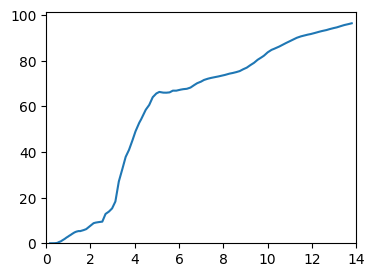

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
ax.plot(time, mass)

ax.set_xlim(0, 14)
ax.set_ylim(0, None)

In [22]:
meta['redshift'][33]

2.0020281392528516

In [23]:
meta['time'][33]

3.2844834161372742